In [26]:
import pandas as pd
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

credit_cards=pd.read_csv('credit_card_data.csv')

In [27]:
#one liner to see number of rows and columns in a Pandas dataframe
rows, columns = credit_cards.shape

print("The number of rows in the DataFrame is: ", rows)
print("The number of columns in the DataFrame is: ", columns)

The number of rows in the DataFrame is:  8950
The number of columns in the DataFrame is:  18


In [28]:
print(credit_cards.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [29]:
# check for any null values
credit_cards.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [30]:
#drop the rows with missing values
credit_cards = credit_cards.dropna()

In [31]:
# create the clusters
clustering_data = credit_cards[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]]
for i in clustering_data.columns:
    MinMaxScaler(i)
    
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(clustering_data)
credit_cards["CREDIT_CARD_SEGMENTS"] = clusters

In [32]:
print(clustering_data)

          BALANCE  PURCHASES  CREDIT_LIMIT
0       40.900749      95.40        1000.0
1     3202.467416       0.00        7000.0
2     2495.148862     773.17        7500.0
4      817.714335      16.00        1200.0
5     1809.828751    1333.28        1800.0
...           ...        ...           ...
8943     5.871712      20.90         500.0
8945    28.493517     291.12        1000.0
8947    23.398673     144.40        1000.0
8948    13.457564       0.00         500.0
8949   372.708075    1093.25        1200.0

[8636 rows x 3 columns]


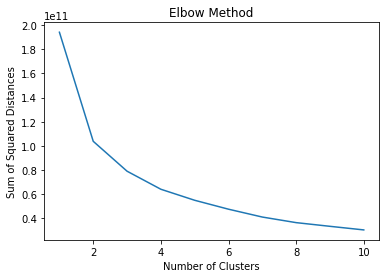

In [33]:
X = clustering_data.values

# elbow method

def elbow_method(X, max_clusters):
    sse = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        sse.append(kmeans.inertia_)
        
    plt.plot(range(1, max_clusters+1), sse)
    plt.title("Elbow Method")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Distances")
    plt.show()

elbow_method(X, 10)

In [43]:
# no significant sum of squared distances reduction past 4 clusters

clustering_data = credit_cards[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]]
for i in clustering_data.columns:
    MinMaxScaler(i)
    
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(clustering_data)
credit_cards["CREDIT_CARD_SEGMENTS"] = clusters

In [44]:
#transform names of clusters for easy interpretation

credit_cards["CREDIT_CARD_SEGMENTS"] = credit_cards["CREDIT_CARD_SEGMENTS"].map({0: "Cluster 1", 1: 
    "Cluster 2", 2: "Cluster 3", 3: "Cluster 4"})
print(credit_cards["CREDIT_CARD_SEGMENTS"].head(10))

0     Cluster 2
1     Cluster 3
2     Cluster 3
4     Cluster 2
5     Cluster 2
6     Cluster 1
7     Cluster 2
8     Cluster 3
9     Cluster 3
10    Cluster 2
Name: CREDIT_CARD_SEGMENTS, dtype: object


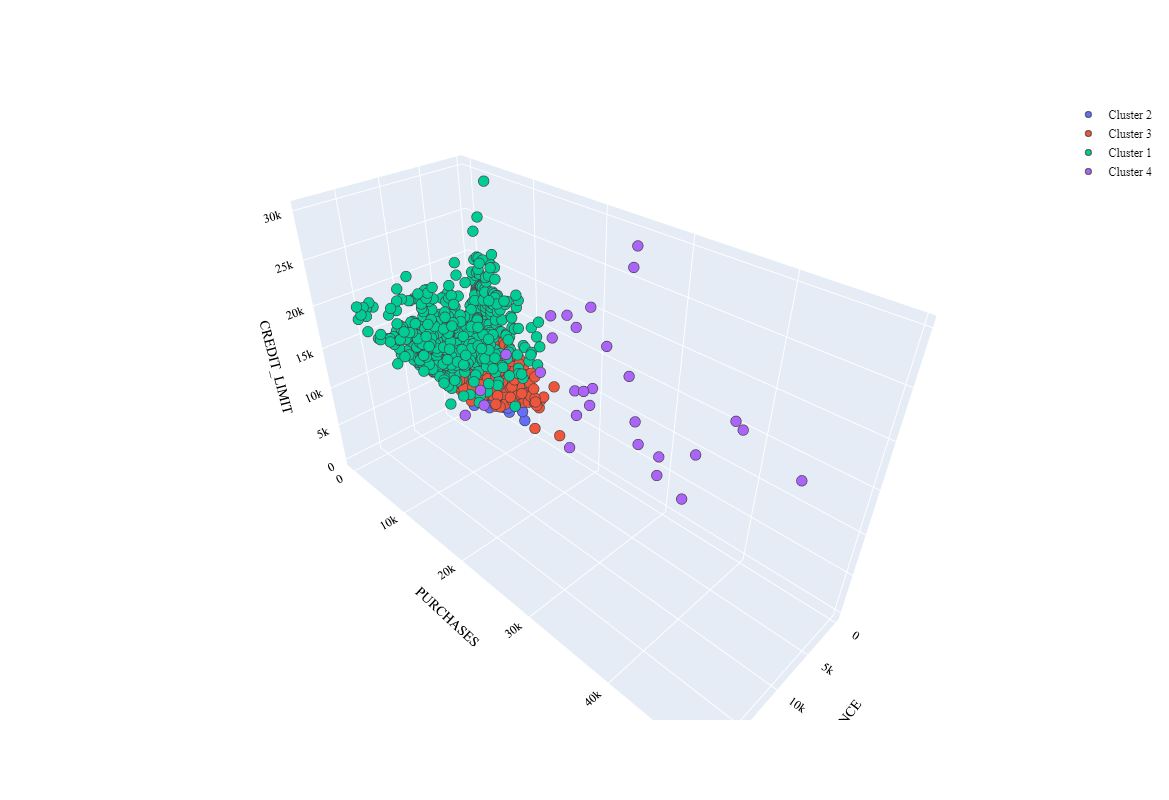

In [46]:
#plot the clusters on a 3D graph using Plotly

PLOT = go.Figure()
for i in list(credit_cards["CREDIT_CARD_SEGMENTS"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = credit_cards[credit_cards["CREDIT_CARD_SEGMENTS"]== i]['BALANCE'],
                                y = credit_cards[credit_cards["CREDIT_CARD_SEGMENTS"] == i]['PURCHASES'],
                                z = credit_cards[credit_cards["CREDIT_CARD_SEGMENTS"] == i]['CREDIT_LIMIT'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='BALANCE: %{x} <br>PURCHASES %{y} <br>DCREDIT_LIMIT: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'BALANCE', titlefont_color = 'black'),
                                yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                                zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))